<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/10wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상 

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-xfh-AQQI0B_GONOjgj9DCi&si=uWImDc1bYBoNqCB_ >}}

# 2. Imports 

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3. 예비학습: optimizer 사용 고급 

`-` 주어진 자료가 아래와 같다고 하자. 

In [3]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
x = x.reshape(-1,1)
ones= torch.ones(100).reshape(-1,1)
X = torch.concat([ones,x],axis=-1)
ϵ = torch.randn(100).reshape(-1,1)*0.5
y = 2.5+ 4*x + ϵ

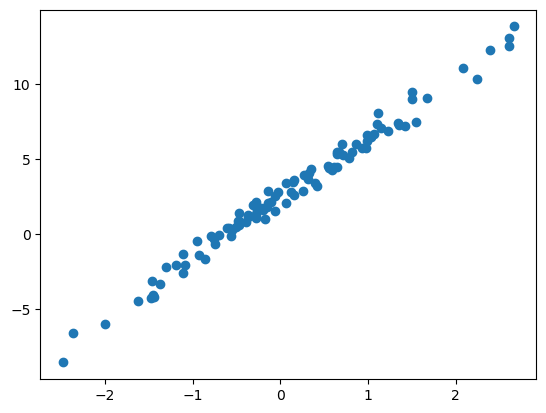

In [4]:
plt.plot(x,y,'o')

`-` 문제1: 아래와 같이 최초의 직선을 생성하였다. 

In [5]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)

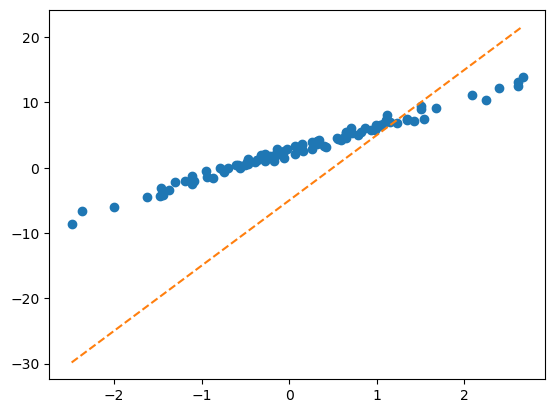

In [6]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')

`torch.optim.SGD`를 이용하여 What을 update하라. 학습률은 0.1로 설정하고 30회 update하라. 

`(풀이)`

In [7]:
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD([What],lr=0.1) 
## optimizr = torch.optim.SGD(???,lr=0.1)  ??? 자리에는 학습하고 싶은 파라메터를 list로 넣음
#--#
for epoc in range(30):
    ## step1
    yhat = X@What 
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

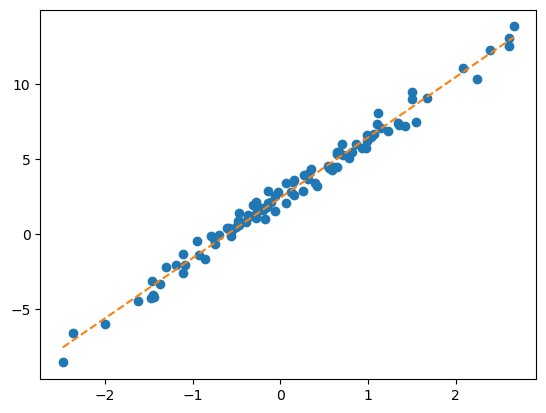

In [8]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')

`-` 문제2: 아래와 같이 최초의 직선을 생성하였다. 

In [9]:
w = torch.tensor(10.0,requires_grad=True)
b = torch.tensor(-5.0,requires_grad=True)

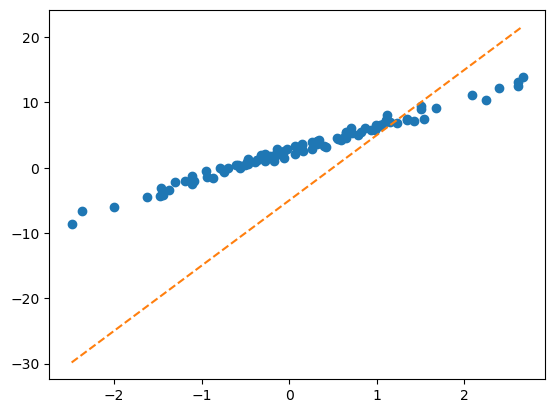

In [10]:
plt.plot(x,y,'o')
plt.plot(x,(x*w + b).data,'--')

`torch.optim.SGD`를 이용하여 What을 update하라. 학습률은 0.1로 설정하고 30회 update하라. 

In [11]:
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD([b,w],lr=0.1) 
## optimizr = torch.optim.SGD(???,lr=0.1)  ??? 자리에는 학습하고 싶은 파라메터를 list로 넣음
#--#
for epoc in range(30):
    ## step1
    yhat = x*w + b 
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

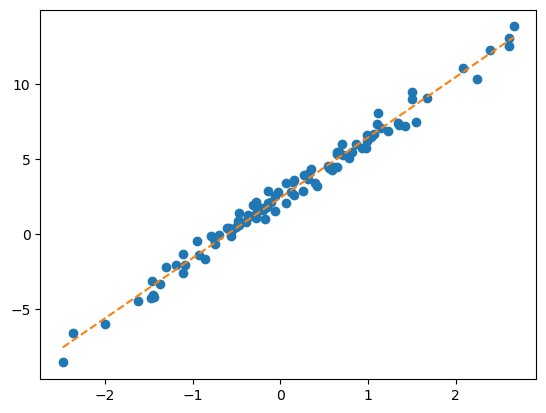

In [12]:
plt.plot(x,y,'o')
plt.plot(x,(x*w + b).data,'--')

# 4. 추천시스템의 학습전략

ref: <https://namu.wiki/w/나는%20SOLO>

## A. Data: 나는 SOLO

`-` Data 

In [13]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2024/main/posts/solo.csv',index_col=0)
df_view

,영식(IN),영철(IN),영호(IS),광수(IS),상철(EN),영수(EN),규빈(ES),다호(ES)
옥순(IN),NaN,4.02,3.45,3.42,0.84,1.12,0.43,0.49
영자(IN),3.93,3.99,3.63,3.43,0.98,0.96,0.52,NaN
정숙(IS),3.52,3.42,4.05,4.06,0.39,NaN,0.93,0.99
영숙(IS),3.43,3.57,NaN,3.95,0.56,0.52,0.89,0.89
순자(EN),1.12,NaN,0.59,0.43,4.01,4.16,3.52,3.38
현숙(EN),0.94,1.05,0.32,0.45,4.02,3.78,NaN,3.54
서연(ES),0.51,0.56,0.88,0.89,3.50,3.64,4.04,4.10
보람(ES),0.48,0.51,1.03,NaN,3.52,4.00,3.82,NaN
하니(I),4.85,4.82,NaN,4.98,4.53,4.39,4.45,4.52


`-` 데이터를 이해할 때 필요한 가정들 -- 제가 마음대로 설정했어요.. 

- 궁합이 잘맞으면 5점, 잘 안맞으면 0점 이다. 
- MBTI 성향에 따라서 궁함의 정도가 다르다. 특히 I/E의 성향일치가 중요하다. 
- 하니는 모든 사람들과 대체로 궁합이 잘 맞는다. 
- 하니는 I성향의 사람들과 좀 더 잘 맞는다. 

## B. Fit / Predict

`-` 목표: NaN을 추정 

`-` 수동추론: 그럴듯한 숫자를 추정해보자. 

- 옥순(IN),영식(IN)의 궁합은? $\to$ 둘다 IN 이므로 잘 맞을듯 $\to$ 4.0 정도? 
- 영자(IN),다호(ES)의 궁합은? $\to$ 잘 안맞을듯 
- 하니(I),영호(ES)의 궁합은? $\to$ 하니는 모두 좋아하므로 기본적으로 4.5 정도 + 하니는 I성향이므로 더 잘 맞을듯 $\to$ 거의 4.9 아닐까?

`-` 좀 더 체계적인 추론 전략: (1) 사람들이 가지고 있는 성향 (2) 사람자체의 절대매력을 수치화 하자. 

- 옥순(IN)의 IN성향, 옥순(IN)의 매력 = (0.90, 0.65), 1.01
- 영식(IN)의 IN성향, 영식(IN)의 매력 = (1.00, 0.70), 1.00
- 영자(IN)의 IN성향, 영자(IN)의 매력 = (0.95 ,0.62), 0.95
- 다호(ES)의 IN성향, 다호(ES)의 매력 = (-1.00 ,-0.70), 1.05
- 하니(I)의 IN성향, 하니(I)의 매력 = (1,0), 3.00
- 영호(IS)의 IS성향, 영호(IS)의 매력 = (0.98 , -0.7), 0.95

**(1)** 옥순(IN)과 영식(IN)의 궁합 $\approx$ 옥순의I성향$\times$영식의I성향 $+$ 옥순의N성향$\times$영식의N성향 $+$ 옥순의매력 $+$ 영식의매력 

In [14]:
옥순성향 = torch.tensor([1.22,0.49]).reshape(1,2)
옥순매력 = torch.tensor(1.21)
영식성향 = torch.tensor([1.20,0.5]).reshape(1,2)
영식매력 = torch.tensor(1.2)
((옥순성향*영식성향).sum() + 옥순매력 + 영식매력) # 옥순과 영식의 궁합: a ∘ b 로 내적구함 + 이후에 매력을 더함 
(옥순성향 @ 영식성향.T + 옥순매력 + 영식매력) # 옥순과 영식의 궁합: a.T @ b 로 내적구함 + 이후에 매력을 더함

tensor([[4.1190]])

In [15]:
(옥순성향*영식성향).sum()

tensor(1.7090)

In [16]:
옥순성향 @ 영식성향.T

tensor([[1.7090]])

**(2)** 영자(IN)와 다호(ES)의 궁합 $\approx$ 영자I성향$\times$다호I성향 $+$ 영자N성향$\times$다호의N성향 $+$ 영자의매력 $+$ 다호의매력 

In [17]:
영자성향 = torch.tensor([1.17,0.44]).reshape(1,2)
영자매력 = torch.tensor(1.25)
다호성향 = torch.tensor([-1.22,-0.6]).reshape(1,2)
다호매력 = torch.tensor(1.15)
((영자성향*다호성향).sum() + 영자성향 + 다호성향)
(영자성향 @ 다호성향.T + 영자매력 + 다호매력)

tensor([[0.7086]])

**(3)** 하니(I)와 영호(IS)의 궁합 $\approx$ 하니I성향$\times$영호I성향 $+$ 하니N성향$\times$영호의N성향 $+$ 하니의매력 $+$ 영호의매력 

In [18]:
하니성향 = torch.tensor([0.2,0]).reshape(1,2)
하니매력 = torch.tensor(3.6)
영호성향 = torch.tensor([1.23,-0.7]).reshape(1,2)
영호매력 = torch.tensor(1.11)
((하니성향*영호성향).sum() + 하니매력 + 영호매력)
(하니성향 @ 영호성향.T + 하니매력 + 영호매력)

tensor([[4.9560]])

> 전체적으로 그럴싸함 

`-` 전체 사용자의 설정값 

In [19]:
옥순성향 = torch.tensor([1.22,0.49]).reshape(1,2)
영자성향 = torch.tensor([1.17,0.44]).reshape(1,2)
정숙성향 = torch.tensor([1.21,-0.45]).reshape(1,2)
영숙성향 = torch.tensor([1.20,-0.50]).reshape(1,2)
순자성향 = torch.tensor([-1.20,0.51]).reshape(1,2)
현숙성향 = torch.tensor([-1.23,0.48]).reshape(1,2)
서연성향 = torch.tensor([-1.20,-0.48]).reshape(1,2)
보람성향 = torch.tensor([-1.19,-0.49]).reshape(1,2)
하니성향 = torch.tensor([0.2,0]).reshape(1,2)
W = torch.concat([옥순성향,영자성향,정숙성향,영숙성향,순자성향,현숙성향,서연성향,보람성향,하니성향])
b1 = torch.tensor([1.21,1.25,1.10,1.11,1.12,1.13,1.14,1.12,3.6]).reshape(-1,1) 
W,b1

(tensor([[ 1.2200,  0.4900],
         [ 1.1700,  0.4400],
         [ 1.2100, -0.4500],
         [ 1.2000, -0.5000],
         [-1.2000,  0.5100],
         [-1.2300,  0.4800],
         [-1.2000, -0.4800],
         [-1.1900, -0.4900],
         [ 0.2000,  0.0000]]),
 tensor([[1.2100],
         [1.2500],
         [1.1000],
         [1.1100],
         [1.1200],
         [1.1300],
         [1.1400],
         [1.1200],
         [3.6000]]))

In [20]:
영식성향 = torch.tensor([1.20,0.5]).reshape(1,2)
영철성향 = torch.tensor([1.22,0.45]).reshape(1,2)
영호성향 = torch.tensor([1.23,-0.7]).reshape(1,2)
광수성향 = torch.tensor([1.21,-0.6]).reshape(1,2)
상철성향 = torch.tensor([-1.28,0.6]).reshape(1,2)
영수성향 = torch.tensor([-1.24,0.5]).reshape(1,2)
규빈성향 = torch.tensor([-1.20,-0.5]).reshape(1,2)
다호성향 = torch.tensor([-1.22,-0.6]).reshape(1,2)
M = torch.concat([영식성향,영철성향,영호성향,광수성향,상철성향,영수성향,규빈성향,다호성향]) # 각 column은 남성출연자의 성향을 의미함
b2 = torch.tensor([1.2,1.10,1.11,1.25,1.18,1.11,1.15,1.15]).reshape(-1,1)
M,b2

(tensor([[ 1.2000,  0.5000],
         [ 1.2200,  0.4500],
         [ 1.2300, -0.7000],
         [ 1.2100, -0.6000],
         [-1.2800,  0.6000],
         [-1.2400,  0.5000],
         [-1.2000, -0.5000],
         [-1.2200, -0.6000]]),
 tensor([[1.2000],
         [1.1000],
         [1.1100],
         [1.2500],
         [1.1800],
         [1.1100],
         [1.1500],
         [1.1500]]))

`-` 아래의 행렬곱 관찰 

In [21]:
W @ M.T + (b1 + b2.T)

tensor([[4.1190, 4.0189, 3.4776, 3.6422, 1.1224, 1.0522, 0.6510, 0.5776],
        [4.0740, 3.9754, 3.4911, 3.6517, 1.1964, 1.1292, 0.7760, 0.7086],
        [3.5270, 3.4737, 4.0133, 4.0841, 0.4612, 0.4846, 1.0230, 1.0438],
        [3.5000, 3.4490, 4.0460, 4.1120, 0.4540, 0.4820, 1.0700, 1.0960],
        [1.1350, 0.9855, 0.3970, 0.6120, 4.1420, 3.9730, 3.4550, 3.4280],
        [1.0940, 0.9454, 0.3911, 0.6037, 4.1724, 4.0052, 3.5160, 3.4926],
        [0.6600, 0.5600, 1.1100, 1.2260, 3.5680, 3.4980, 3.9700, 4.0420],
        [0.6470, 0.5477, 1.1093, 1.2241, 3.5292, 3.4606, 3.9430, 4.0158],
        [5.0400, 4.9440, 4.9560, 5.0920, 4.5240, 4.4620, 4.5100, 4.5060]])

---저거 따져보자--- 

${\bf W} = \begin{bmatrix}
1.2200 & 0.4900 \\
1.1700 & 0.4400 \\
1.2100 & -0.4500 \\
1.2000 & -0.5000 \\
-1.2000 & 0.5100 \\
-1.2300 & 0.4800 \\
-1.2000 & -0.4800 \\
-1.1900 & -0.4900 \\
0.2000 & 0.0000
\end{bmatrix}$

${\bf M}^\top = \begin{bmatrix}
1.2000 & 1.2200 & 1.2300 & 1.2100 & -1.2800 & -1.2400 & -1.2000 & -1.2200 \\
0.5000 & 0.4500 & -0.7000 & -0.6000 & 0.6000 & 0.5000 & -0.5000 & -0.6000
\end{bmatrix}$

${\bf W} @ {\bf M}^\top = \begin{bmatrix}
1.7090 & 1.7089 & 1.1576 & 1.1822 & -1.2676 & -1.2678 & -1.7090 & -1.7824 \\
1.6240 & 1.6254 & 1.1311 & 1.1517 & -1.2336 & -1.2308 & -1.6240 & -1.6914 \\
1.2270 & 1.2737 & 1.8033 & 1.7341 & -1.8188 & -1.7254 & -1.2270 & -1.2062 \\
1.1900 & 1.2390 & 1.8260 & 1.7520 & -1.8360 & -1.7380 & -1.1900 & -1.1640 \\
-1.1850 & -1.2345 & -1.8330 & -1.7580 &  1.8420 &  1.7430 &  1.1850 &  1.1580 \\
-1.2360 & -1.2846 & -1.8489 & -1.7763 &  1.8624 &  1.7652 &  1.2360 &  1.2126 \\
-1.6800 & -1.6800 & -1.1400 & -1.1640 &  1.2480 &  1.2480 &  1.6800 &  1.7520 \\
-1.6730 & -1.6723 & -1.1207 & -1.1459 &  1.2292 &  1.2306 &  1.6730 &  1.7458 \\
0.2400 &  0.2440 &  0.2460 &  0.2420 & -0.2560 & -0.2480 & -0.2400 & -0.2440
\end{bmatrix}$

$\begin{align*} bias =~& \begin{bmatrix}
1.2100 \\
1.2500 \\
1.1000 \\
1.1100 \\
1.1200 \\
1.1300 \\
1.1400 \\
1.1200 \\
3.6000
\end{bmatrix} +\begin{bmatrix}
1.2000 & 1.1000 & 1.1100 & 1.2500 & 1.1800 & 1.1100 & 1.1500 & 1.1500
\end{bmatrix}\\ \\ 
=~& \begin{bmatrix}
2.4100 & 2.3100 & 2.3200 & 2.4600 & 2.3900 & 2.3200 & 2.3600 & 2.3600 \\
2.4500 & 2.3500 & 2.3600 & 2.5000 & 2.4300 & 2.3600 & 2.4000 & 2.4000 \\
2.3000 & 2.2000 & 2.2100 & 2.3500 & 2.2800 & 2.2100 & 2.2500 & 2.2500 \\
2.3100 & 2.2100 & 2.2200 & 2.3600 & 2.2900 & 2.2200 & 2.2600 & 2.2600 \\
2.3200 & 2.2200 & 2.2300 & 2.3700 & 2.3000 & 2.2300 & 2.2700 & 2.2700 \\
2.3300 & 2.2300 & 2.2400 & 2.3800 & 2.3100 & 2.2400 & 2.2800 & 2.2800 \\
2.3400 & 2.2400 & 2.2500 & 2.3900 & 2.3200 & 2.2500 & 2.2900 & 2.2900 \\
2.3200 & 2.2200 & 2.2300 & 2.3700 & 2.3000 & 2.2300 & 2.2700 & 2.2700 \\
4.8000 & 4.7000 & 4.7100 & 4.8500 & 4.7800 & 4.7100 & 4.7500 & 4.7500
\end{bmatrix} \end{align*}$

${\bf W} @ {\bf M}^\top + bias = \begin{bmatrix}
4.1190 & 4.0189 & 3.4776 & 3.6422 & 1.1224 & 1.0522 & 0.6510 & 0.5776 \\
4.0740 & 3.9754 & 3.4911 & 3.6517 & 1.1964 & 1.1292 & 0.7760 & 0.7086 \\
3.5270 & 3.4737 & 4.0133 & 4.0841 & 0.4612 & 0.4846 & 1.0230 & 1.0438 \\
3.5000 & 3.4490 & 4.0460 & 4.1120 & 0.4540 & 0.4820 & 1.0700 & 1.0960 \\
1.1350 & 0.9855 & 0.3970 & 0.6120 & 4.1420 & 3.9730 & 3.4550 & 3.4280 \\
1.0940 & 0.9454 & 0.3911 & 0.6037 & 4.1724 & 4.0052 & 3.5160 & 3.4926 \\
0.6600 & 0.5600 & 1.1100 & 1.2260 & 3.5680 & 3.4980 & 3.9700 & 4.0420 \\
0.6470 & 0.5477 & 1.1093 & 1.2241 & 3.5292 & 3.4606 & 3.9430 & 4.0158 \\
5.0400 & 4.9440 & 4.9560 & 5.0920 & 4.5240 & 4.4620 & 4.5100 & 4.5060
\end{bmatrix}$

`-` ${\bf W} @ {\bf M}^\top + bias$ 의 (1,1)의 원소값을 계산해보면 아래와 같다. 

- 옥순의I성향$\times$영식의I성향 $+$ 옥순의N성향$\times$영식의N성향 $+$ 옥순의매력 $+$ 영식의매력 = 4.1190
- $1.220 \times 1.2000 + 0.4900 \times 0.5000 + 1.2100 + 2.4100 = 4.1190$

`-` 궁합매트릭스: ${\bf W} @ {\bf M}^\top + bias$를 계산하면 (9,8) 인 행렬이 나올텐데 이 행렬의 $(i,j)$의 원소는 $i$-th 여성출연자와 $j$-th 남성출연자가 얼마나 잘 맞는지를 나타내는 숫자가 된다. (숫자가 높을수록 잘 맞음) 편의상 이 수업에서는 이 매트릭스를 "궁합매트릭스" 라고 정의하자. 

`-` 주어진 자료와 우리가 임의로 만든 궁합매트릭스를 비교해보자. 

`-` 우리의 전략

1. ${\bf W} @ {\bf M}^\top + bias$의 값과 `df_view` 의 값이 **`nan`을 제외한 곳에서** 거의 비슷하게 되도록 ${\bf W}$, ${\bf M}$, $bias$를 잘 때려맞추면 되는것 아니야?

2. 1을 만족하는 ${\bf W}$, ${\bf M}$, $bias$를 찾았으면 그 숫자들을 이용하여 `df_view`의 `nan` 을 추정한다. 

`-` 따라서 모형은 아래와 같이 볼 수 있다. 

$${\tt df\_view} \approx {\bf W}@{\bf M}^\top + bias$$

In [31]:
df_view, 

,영식(IN),영철(IN),영호(IS),광수(IS),상철(EN),영수(EN),규빈(ES),다호(ES)
옥순(IN),NaN,4.02,3.45,3.42,0.84,1.12,0.43,0.49
영자(IN),3.93,3.99,3.63,3.43,0.98,0.96,0.52,NaN
정숙(IS),3.52,3.42,4.05,4.06,0.39,NaN,0.93,0.99
영숙(IS),3.43,3.57,NaN,3.95,0.56,0.52,0.89,0.89
순자(EN),1.12,NaN,0.59,0.43,4.01,4.16,3.52,3.38
현숙(EN),0.94,1.05,0.32,0.45,4.02,3.78,NaN,3.54
서연(ES),0.51,0.56,0.88,0.89,3.50,3.64,4.04,4.10
보람(ES),0.48,0.51,1.03,NaN,3.52,4.00,3.82,NaN
하니(I),4.85,4.82,NaN,4.98,4.53,4.39,4.45,4.52


In [33]:
W@M.T + b1+b2.T

tensor([[4.1190, 4.0189, 3.4776, 3.6422, 1.1224, 1.0522, 0.6510, 0.5776],
        [4.0740, 3.9754, 3.4911, 3.6517, 1.1964, 1.1292, 0.7760, 0.7086],
        [3.5270, 3.4737, 4.0133, 4.0841, 0.4612, 0.4846, 1.0230, 1.0438],
        [3.5000, 3.4490, 4.0460, 4.1120, 0.4540, 0.4820, 1.0700, 1.0960],
        [1.1350, 0.9855, 0.3970, 0.6120, 4.1420, 3.9730, 3.4550, 3.4280],
        [1.0940, 0.9454, 0.3911, 0.6037, 4.1724, 4.0052, 3.5160, 3.4926],
        [0.6600, 0.5600, 1.1100, 1.2260, 3.5680, 3.4980, 3.9700, 4.0420],
        [0.6470, 0.5477, 1.1093, 1.2241, 3.5292, 3.4606, 3.9430, 4.0158],
        [5.0400, 4.9440, 4.9560, 5.0920, 4.5240, 4.4620, 4.5100, 4.5060]])

`-` 아래의 정보를 참고하여 위의 수식을 다시 정리하면..

|W|M|여성특징|남성특징| I궁합| N궁합 | bias | yhat |y| 
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|옥순(IN)|영철(IN)|1.22, 0.49 | 1.22, 0.45 |1.4884^[1.22 \*1.22 = 1.4884]| 0.2205^[0.49 \* 0.50 = 0.2205]| 2.31^[1.21+1.1 = 2.31]|4.0189|4.02|
|옥순(IN)|영호(IS)|1.22, 0.49 | 1.23, -0.7| 1.1576^[1.22 \*1.23 = 1.5006]| -0.3423^[0.49 \* 0.7 = -0.3423]|2.32^[1.21+1.11 = 2.32]|3.4776|3.45|
|...|...|... | ... | ...|...|
|하니(I)|영식(IN)|0.20, 0.00 | 1.20, 0.5| 0.24| 0 |4.8|5.04|4.85|
|...|...|... | ... | ...|...|

- 걱정1: 5.0이 넘는 값도 있네? 잘못잡으면 음수가 나올지도? 
- 걱정2: 저러한 yhat (4.0189, 3.4776,5.04)을 만드는게 꼭 저 조합만 있는게 아님. 당장에 남성의 바이어스에 일괄적으로 -2를 넣고 여성의 바이어스에 일괄적으로 +2를 해도 성립함.

`-` (걱정은 뒤로 하고) `yhat` $\approx$ `y` 를 만족하도록 해보자! (1) 아무 `yhat` 을 구한다. (2) `yhat`과 `y`가 비슷한 정도를 측정한다. (3) 더 적당한 `yhat`값을 update한다. 

- `yhat`은 어떻게 구하지? (여성특징$\otimes$남성특징).sum() + bias? 
- 그럼 여성특징,남성특징,여성bias(=여성매력),남성bias(=남성매력)는 어떻게 구하지?? 생각해보니까 데이터에서 주어진건 아니잖아??

`-` `여성특징`,`남성특징`, `여성bais`,`남성bais` 를 어떻게 만들지?

- 그전엔 어떻게 했지?? `W`을 보고 적당히 특징을 상상하고 `여성특징`,`여성bias`의 값을 때려넣음 + `M`를 보고 적당히 특징을 상상하고 `남성특징`, `남성bias`의 값을 채워 넣음. 
- 자동화하려면? `W` $\to$ `여성특징`, `W` $\to$ `여성bias`, `M` $\to$ `남성특징`, `M` $\to$ `남성bias` 인 함수를 만들자.

`-` 앞으로 할일1: 아래와 같은 함수들을 만들자. 
    
- 옥순 $\to$ 옥순의 특징 = (1.22, 0.49) 
- 옥순 $\to$ 옥순의 매력 = 1.22
- 영철 $\to$ 영철의 특징 = (1.22, 0.45) 
- 영철 $\to$ 영철의 매력 = 1.22 
...


`-` 앞으로 할일2: 우리가 익숙한 셋팅 (step1~4)
    
1. `여성특징`, `여성bias`, `남성특징`, `남성bias`  $\to$ `yhat` 를 수행
2. `y` $\approx$ `yhat` 인지 체크: `loss = loss_fn(yhat,y)`
3. `loss.backward()`
4. 더 나은 `여성특징`, `여성bias`, `남성특징`, `남성bias` 로 update!

## C. 할일1의 구현

`-` dataframe의 변형 

`-` 이름을 숫자화

In [1068]:
w = {'옥순(IN)':0, '영자(IN)':1, '정숙(IS)':2, '영숙(IS)':3, '순자(EN)':4, '현숙(EN)':5, '서연(ES)':6, '보람(ES)':7, '하니(I)':8}
m = {'영식(IN)':0, '영철(IN)':1, '영호(IS)':2, '광수(IS)':3, '상철(EN)':4, '영수(EN)':5, '규빈(ES)':6, '다호(ES)':7}

`-` 텐서화 + one_hot-인코딩 

`-` `X1` -> `여성특징`, `X1` -> `여성bias`, `X2` -> `남성특징`, `X2` -> `남성bias` 구현  

## D. 할일2의 구현 -- step1~4 수행 

`-` step1: yhat을 구하자. 

`-` step2: 손실계산 

`-` step3: 미분 

`-` step4: update 

## E. 코드정리 

In [29]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2024/main/posts/solo.csv',index_col=0)
df_train = df_view.stack().reset_index().set_axis(['W','M','y'],axis=1)
w = {'옥순(IN)':0, '영자(IN)':1, '정숙(IS)':2, '영숙(IS)':3, '순자(EN)':4, '현숙(EN)':5, '서연(ES)':6, '보람(ES)':7, '하니(I)':8}
m = {'영식(IN)':0, '영철(IN)':1, '영호(IS)':2, '광수(IS)':3, '상철(EN)':4, '영수(EN)':5, '규빈(ES)':6, '다호(ES)':7}
X1 = torch.tensor(df_train['W'].map(w)) # length-n vector 
X2 = torch.tensor(df_train['M'].map(m)) # length-n vector 
E1 = torch.nn.functional.one_hot(X1).float()
E2 = torch.nn.functional.one_hot(X2).float()
y = torch.tensor(df_train['y']).float().reshape(-1,1)
#--#

## F. 모형의 해석 